In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

Code for getting CSV file.

In [2]:

import pandas as pd
import ccxt

# Initialize the KuCoin exchange
exchange = ccxt.kucoin()

reqd_coin_name = 'BTC/USDT'
reqd_timeframe = '2h'




ohlcv = exchange.fetch_ohlcv(reqd_coin_name, reqd_timeframe, limit=200)


# for candle in ohlcv:
    # print(candle)

# Convert to DataFrame
df = pd.DataFrame(ohlcv, columns=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')

df['Timestamp'] = df['Timestamp'].dt.tz_localize('UTC').dt.tz_convert('Asia/Kolkata')

reqd_coin_name = reqd_coin_name.replace('/','-')


csv_file_name = f'{reqd_coin_name}-{reqd_timeframe}-ohlc-values.csv'
df.to_csv(csv_file_name, index=False)


print(f"CSV file saved: {csv_file_name}")
print(df)

CSV file saved: BTC-USDT-2h-ohlc-values.csv
                    Timestamp     Open     High      Low    Close      Volume
0   2025-02-15 07:30:00+05:30  97807.0  97977.2  97632.1  97656.4   65.827639
1   2025-02-15 09:30:00+05:30  97656.5  97799.9  97444.4  97610.2  113.043261
2   2025-02-15 11:30:00+05:30  97610.3  97673.8  97350.8  97350.9   55.664058
3   2025-02-15 13:30:00+05:30  97350.9  97608.9  97307.4  97562.8   44.464409
4   2025-02-15 15:30:00+05:30  97562.9  97730.4  97451.2  97610.3   54.215562
..                        ...      ...      ...      ...      ...         ...
195 2025-03-03 13:30:00+05:30  92369.4  92398.8  91151.1  91854.2  250.253209
196 2025-03-03 15:30:00+05:30  91854.2  92915.9  91555.4  92735.2  202.681373
197 2025-03-03 17:30:00+05:30  92744.5  93685.6  92668.2  93576.9  174.816583
198 2025-03-03 19:30:00+05:30  93577.0  93711.7  89132.4  90043.2  827.562242
199 2025-03-03 21:30:00+05:30  90043.3  90750.0  89698.3  89913.8  114.433810

[200 rows x 6 colum

print the df.head()

In [3]:
print(df.head())

                  Timestamp     Open     High      Low    Close      Volume
0 2025-02-15 07:30:00+05:30  97807.0  97977.2  97632.1  97656.4   65.827639
1 2025-02-15 09:30:00+05:30  97656.5  97799.9  97444.4  97610.2  113.043261
2 2025-02-15 11:30:00+05:30  97610.3  97673.8  97350.8  97350.9   55.664058
3 2025-02-15 13:30:00+05:30  97350.9  97608.9  97307.4  97562.8   44.464409
4 2025-02-15 15:30:00+05:30  97562.9  97730.4  97451.2  97610.3   54.215562


Explore and Preprocess Data

In [4]:
print(df.isnull().sum())

Timestamp    0
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64


In [5]:
df = df.dropna()

In [6]:
features = ['Open','High','Low','Volume']
target = 'Close'


X = df[features]
y = df[target]

In [7]:
X

,Open,High,Low,Volume
0,97807.0,97977.2,97632.1,65.827639
1,97656.5,97799.9,97444.4,113.043261
2,97610.3,97673.8,97350.8,55.664058
3,97350.9,97608.9,97307.4,44.464409
4,97562.9,97730.4,97451.2,54.215562
...,...,...,...,...
195,92369.4,92398.8,91151.1,250.253209
196,91854.2,92915.9,91555.4,202.681373
197,92744.5,93685.6,92668.2,174.816583
198,93577.0,93711.7,89132.4,827.562242


In [8]:
y

0      97656.4
1      97610.2
2      97350.9
3      97562.8
4      97610.3
        ...   
195    91854.2
196    92735.2
197    93576.9
198    90043.2
199    89913.8
Name: Close, Length: 200, dtype: float64

Split the Data into Training and Testing Sets

In [9]:
X_train , X_test , y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Train the Random Forest Model

In [10]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


In [11]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Make Predictions

In [12]:
y_pred = rf_model.predict(X_test)


In [13]:
y_pred

array([96481.075, 97125.92 , 95978.795, 80462.328, 87104.984, 94141.753,
       98410.865, 85438.795, 84806.108, 94171.08 , 97039.655, 86212.613,
       84478.235, 97810.579, 86886.42 , 85655.488, 95690.901, 84271.093,
       95641.008, 98378.201, 87836.355, 97261.867, 86277.617, 96569.368,
       97249.674, 97008.758, 96234.572, 97041.844, 88507.916, 88688.642,
       97586.954, 96987.542, 96296.556, 98308.058, 85374.333, 95832.362,
       88661.924, 88258.814, 84344.185, 98202.784])

Evaluate the Model

In [14]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Mean Absolute Error: 359.6778249999952
Mean Squared Error: 252618.24602261433


 Visualize Predictions

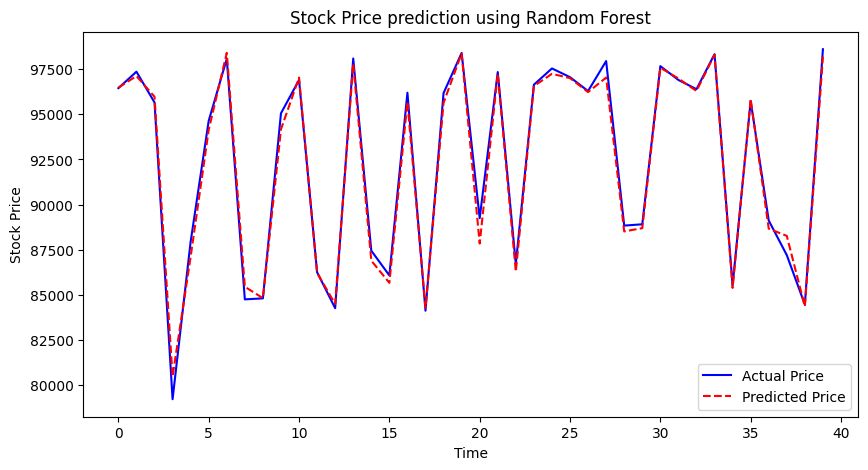

In [15]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual Price', color='blue')
plt.plot(y_pred, label='Predicted Price', color='red', linestyle='dashed')
plt.legend()
plt.title('Stock Price prediction using Random Forest')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

Now, lets predict the future values

In [16]:


latest_data = X.iloc[-1].values.reshape(1, -1)

print('Latest available data for prediction')
print(latest_data)

Latest available data for prediction
[[90043.3        90750.         89698.3          114.43381032]]


In [17]:
latest_data = pd.DataFrame(latest_data, columns=features)

In [18]:
latest_data

,Open,High,Low,Volume
0,90043.3,90750.0,89698.3,114.43381


Predict the Next 2-Hour Price

In [19]:
next_price_1 = rf_model.predict(latest_data)[0]
print(f'Predicted price for next 2 hour timeframe candle close: {next_price_1}')

Predicted price for next 2 hour timeframe candle close: 89368.41099999996


We successfully predicted the price of the stock in the next candle close.